In [511]:
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# data = pd.read_csv("./red-wine.csv")
# features = ["pH", "chlorides", "density", "residual sugar", "alcohol", "total sulfur dioxide"]
# X = data[features]
# y = data.quality
# length = len(features)
# model = keras.Sequential([
#     keras.layers.Dense(units=30, activation='relu', input_shape=[length]),
#     keras.layers.Dense(units=25, activation='relu'),
#     keras.layers.Dense(units=1)
# ])
# model.compile(loss="mse")

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# score = mean_absolute_error(y_test.to_numpy(), y_pred)
# print(score)

In [512]:
# sns.scatterplot(y_pred)
# sns.scatterplot(y_test.to_numpy())

In [513]:
import numpy

data = pd.read_csv("./housing.csv")
data.info()

features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'Latitude', 'Longitude']
X = data[features]
y = data['MedHouseVal']

length = len(features)

model = keras.Sequential([
    keras.layers.Dense(units=14, activation='relu', input_shape=[length]),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=1)
])

model.compile(loss='mae')

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

score = mean_squared_error(y_test.to_numpy(), y_pred)
print(score)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   20640 non-null  int64  
 1   MedInc       20640 non-null  float64
 2   HouseAge     20640 non-null  float64
 3   AveRooms     20640 non-null  float64
 4   AveBedrms    20640 non-null  float64
 5   Population   20640 non-null  float64
 6   AveOccup     20640 non-null  float64
 7   Latitude     20640 non-null  float64
 8   Longitude    20640 non-null  float64
 9   MedHouseVal  20640 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.6 MB
65/65 [==============================] - 0s 795us/step
2.0835507183956015


<Axes: ylabel='Count'>

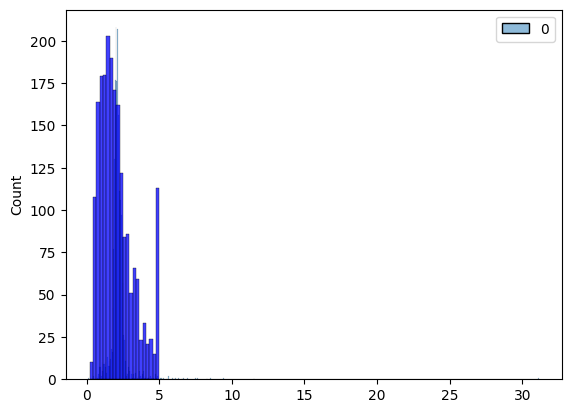

In [514]:
sns.histplot(y_pred, color ='red')
sns.histplot(y_test.to_numpy(), color ='blue')